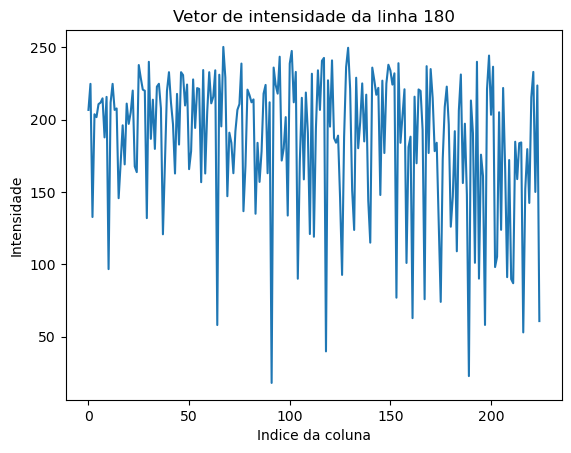

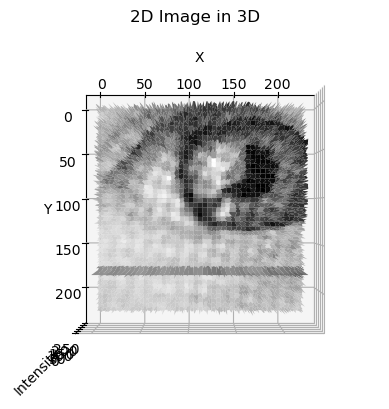

In [15]:
from mpl_toolkits.mplot3d import Axes3D #Biblioteca para plotar em 3D
from matplotlib.image import imread #Biblioteca para ler a imagem
import matplotlib.pyplot as plt #Biblioteca para plotar a imagem
import numpy as np #Biblioteca para manipular matrizes

# Função que converte a imagem para tons de cinza
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.2989,0.5870,0.1140])

# Carrega a imagem
imagem = imread('/home/igor/Documentos/imagens/moire.jpeg')

#Extração das dimensões da imagem
height, width = rgb2gray(imagem).shape

# Criando vetores para o eixo X e Y
x = range(width)
y = range(height)
X, Y = np.meshgrid(x, y)
Z = rgb2gray(imagem)

row_index = 180 # Especifique o índice da linha que você deseja extrair
row_vector = Z[row_index, :]  # Extraia a linha

# Plote o vetor de intensidade da linha
plt.plot(row_vector)
plt.xlabel('Indice da coluna')
plt.ylabel('Intensidade')
plt.title('Vetor de intensidade da linha ' "% s" % int(row_index))
# Mostrando o gráfico
plt.show()

#substituir o valor da linha por 0
Z[row_index, :] = 0 # Substitua a linha por 0

# Criando a figura em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotando a superfície
ax.plot_surface(X, Y, Z, cmap='gray')
ax.mouse_init()
ax.view_init(azim=270, elev=270)
# Setando os labels dos eixos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('2D Image in 3D')
plt.show()



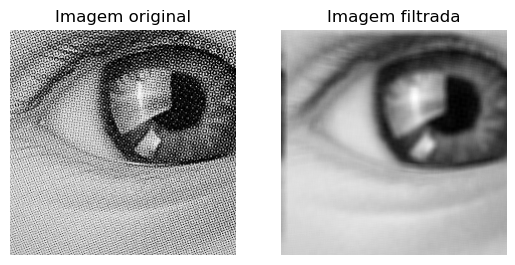

In [14]:
# Função que aplica o filtro gaussiano
def filtro_gaussiano(imagem, s, n=3):

    # Cria a matriz do filtro gaussiano
    matriz = np.zeros(imagem.shape)

    # Preenche a matriz com os valores do filtro gaussiano
    for i in range(n):
        for j in range(n):
            x = i - (n//2)
            y = j - (n//2)
            matriz[i,j] = np.exp(-(x**2 + y**2)/(2*s**2))

    # Normaliza a matriz
    matriz = matriz/np.sum(matriz)
    matriz=np.fft.fft2(matriz)
    # Aplica o filtro na imagem
    imagem = imagem*matriz
    
    return imagem

#fft da imagem
fft_imagem=np.fft.fft2(rgb2gray(imagem))

# Aplica o filtro gaussiano
imagem_filtrada = filtro_gaussiano(fft_imagem,7,8)

# Aplica a transformada inversa
ifft_imagem=abs(np.fft.ifft2(imagem_filtrada))

# Plota a imagem
fig, img =plt.subplots(1,2)
img[0].imshow(rgb2gray(imagem),cmap='gray')
img[0].set_title('Imagem original')
img[0].axis('off')
img[1].imshow(ifft_imagem,cmap='gray')
img[1].set_title('Imagem filtrada')
img[1].axis('off')
plt.show()

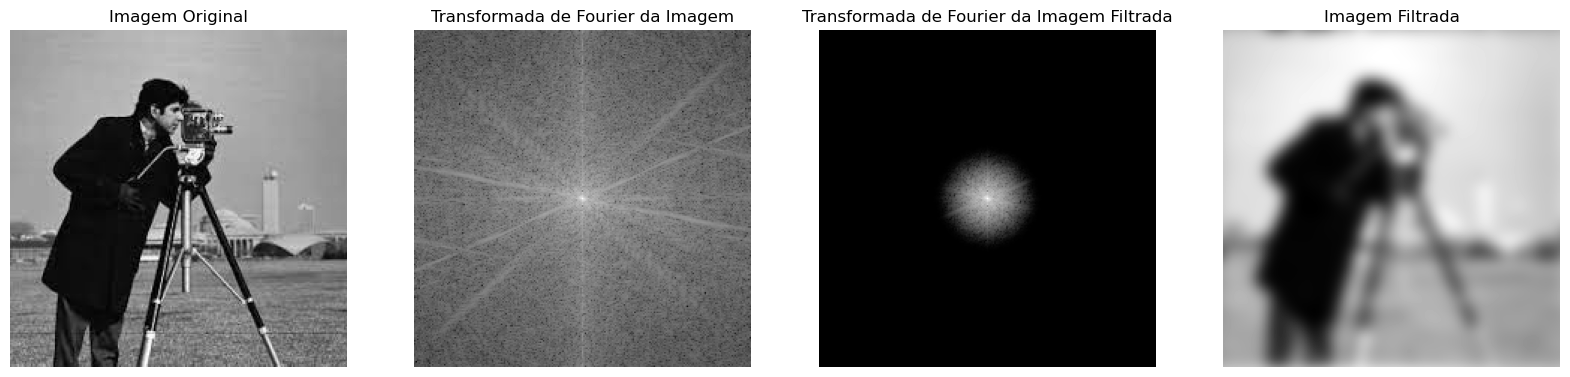

In [13]:
from scipy import fftpack       #Biblioteca para aplicar a transformada de Fourier
from scipy import ndimage       #Biblioteca para aplicar o filtro gaussiano
import matplotlib.pyplot as plt #Biblioteca para plotar a imagem

# Carrega a imagem
image = plt.imread('/home/igor/Documentos/imagens/cameraman.jpeg')

# Convertendo a imagem para tons de cinza
image_gray = rgb2gray(image)

# Fazendo a transformada de Fourier da imagem
image_fft = fftpack.fft2(image_gray)

# Aplicando o filtro gaussiano no domínio da frequência
sigma = 5
image_fft_filtered = ndimage.fourier_gaussian(image_fft, sigma)

# Realizando a transformada inversa de Fourier
image_filtered = fftpack.ifft2(image_fft_filtered)

# Plotando as imagens
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True) #Cria a figura para plotar as imagens

axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title('Imagem Original')
axes[0].axis('off')

axes[1].imshow(np.log(1 + np.abs(np.fft.fftshift(image_fft))), cmap='gray')
axes[1].set_title('Transformada de Fourier da Imagem')
axes[1].axis('off')

axes[2].imshow(np.log(1 + np.abs(np.fft.fftshift(image_fft_filtered))), cmap='gray')
axes[2].set_title('Transformada de Fourier da Imagem Filtrada')
axes[2].axis('off')

axes[3].imshow(np.abs(image_filtered), cmap='gray')
axes[3].set_title('Imagem Filtrada')
axes[3].axis('off')
plt.show()
